<a href="https://colab.research.google.com/github/Chaithanyarajbulla/Fake_News_Detection/blob/main/FAke_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1️⃣ Install required packages**

In [ ]:
!pip install pandas numpy scikit-learn nltk seaborn matplotlib wordcloud kaggle

**2️⃣ Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**4️⃣ Load CSVs**

In [4]:
fake = pd.read_csv('/content/Fake.csv')
real = pd.read_csv('/content/True.csv')
fake['label'] = 0
real['label'] = 1
df = pd.concat([fake, real], axis=0).reset_index(drop=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (44898, 5)


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


**5️⃣ Visualizations**

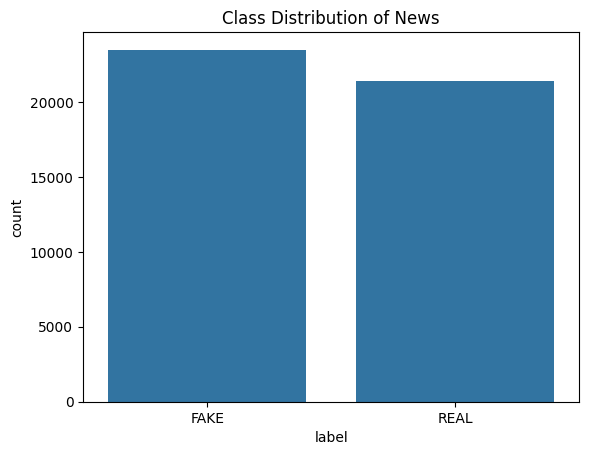

In [21]:
# Class distribution
sns.countplot(x='label', data=df)
plt.xticks([0,1], ['FAKE','REAL'])
plt.title("Class Distribution of News")
plt.show()

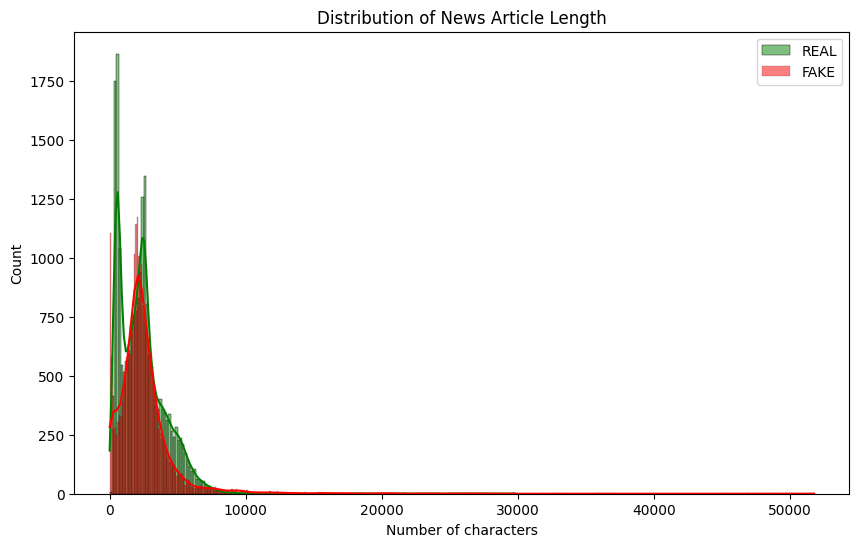

In [6]:
# Text length distribution
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(df[df['label']==1]['text_length'], color='green', label='REAL', kde=True)
sns.histplot(df[df['label']==0]['text_length'], color='red', label='FAKE', kde=True)
plt.legend()
plt.title("Distribution of News Article Length")
plt.xlabel("Number of characters")
plt.show()

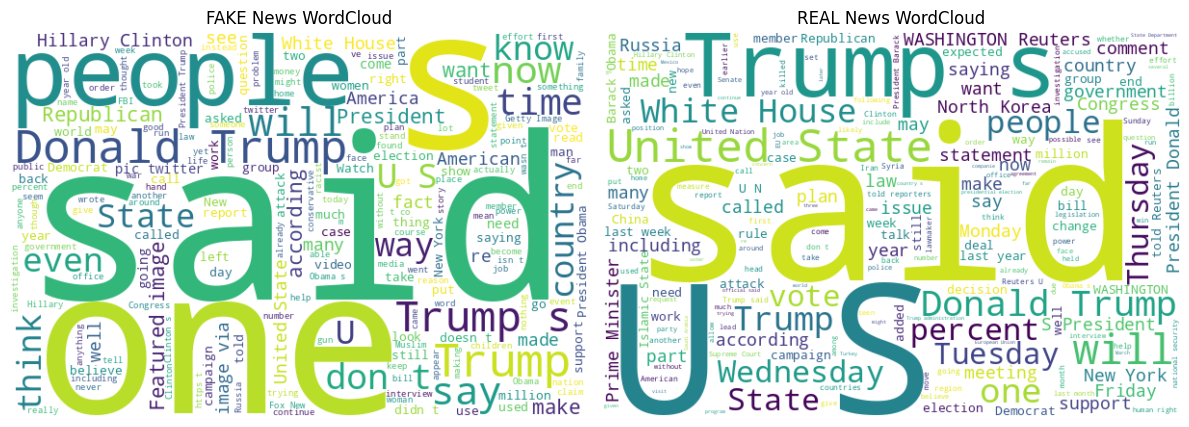

In [19]:
df = df.dropna(subset=['text'])
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
wc_fake = WordCloud(width=600, height=400, background_color='white').generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.title("FAKE News WordCloud")
plt.axis('off')

plt.subplot(1,2,2)
wc_real = WordCloud(width=600, height=400, background_color='white').generate(real_text)
plt.imshow(wc_real, interpolation='bilinear')
plt.title("REAL News WordCloud")
plt.axis('off')

plt.tight_layout()
plt.show()


**6️⃣ Data Preprocessing**

In [11]:
df['content'] = df['title'] + " " + df['text']

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['content'] = df['content'].apply(clean_text)

# Features and labels
X = df['content']
y = df['label']

**7️⃣ Train-Test Split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**8️⃣ Feature Extraction**

In [13]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**9️⃣ Train Model**

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

**Evaluate Model**

In [16]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9868596881959911

Confusion Matrix:
 [[4629   67]
 [  51 4233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



**Predict New News**

In [17]:
def predict_news(news_text):
    news_text = clean_text(news_text)
    vect_text = vectorizer.transform([news_text])
    prediction = model.predict(vect_text)[0]
    return "REAL" if prediction==1 else "FAKE"

**Example**

In [18]:
sample_news = "The stock market is expected to crash tomorrow due to unexpected events."
print("Prediction:", predict_news(sample_news))

Prediction: REAL
